# Pre-requisite Loading

Libraries for model import, evaluation

In [ ]:
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Libraries for image conversions and plotting

In [ ]:
from random import randint
from keras.utils import array_to_img
from cv2 import (cvtColor, COLOR_BGR2RGB)
from matplotlib.pyplot import (subplots, imshow, figure, xticks, yticks, title)
from math import floor

Import os libraries and colab libraries to mount and load data from the Drive

In [ ]:
from google.colab import drive
from os import listdir, chdir, getcwd
import numpy as np

In [ ]:
drive.mount('/content/drive')

try:
  chdir('/content/drive/MyDrive/Major Project')
  print('Successful! Current directory:', getcwd())
except:
  print('Failed to change dir to project root, curr dir is:', getcwd())

Mounted at /content/drive
Successful! Current directory: /content/drive/MyDrive/Major Project


## Loading Images and Labels

In [ ]:
try:
  images = np.load('images.npy')
  labels = np.load('labels.npy')
except:
  print('Failed to load data')

### Encoding Labels for testing

For softmax function, labels need to be encoded as integers in range 0 to (K-1) where K is number of classes. Here we create a dictionary of labels and their encoded value for encoding the label data, as well as reverse of the same for decoding the results after evaluation.

In [ ]:
label_dict = dict()


for i in range(np.unique(labels).shape[0]):
    label_dict[np.unique(labels)[i]] = i

rev_label_dict = { v:k for k,v in label_dict.items()}

for i in range(labels.shape[0]):
    labels[i] = label_dict.get(labels[i])
labels = labels.astype(np.uint8)

Here the data is split into training and testing sets such that X_test and y_test are the images and encoded class results of the same. These are randomly sampled and are used to evaluate the model in further steps.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.5, random_state = 0)

# Model Evaluation

Training time: 290 seconds

After trial-and-error with pre-training and dataset evaluation, we have found the best combination of computational and learning performance from the below loaded CNN model. This Model was pretrained on a set of plant images from [New Plant Disease Dataset on Kaggle](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset).

The model is summarised, described and evaluated here.

In [ ]:
model = load_model('FinalModel')

# summarize
model.summary()

Model: "functional_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 788544)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                50466880  
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                      

## Convolutional Neural Networks

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

### Why ConvNets

A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and the reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

#### What is convolution

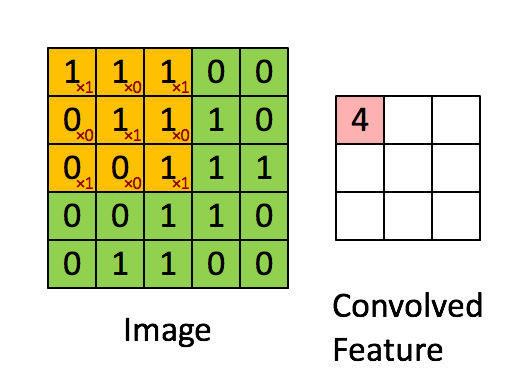

In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in color yellow. We have selected K as a 3x3x1 matrix.

Kernel/Filter, K = <br>
1  0  1<br>
0  1  0<br>
1  0  1<br>

The filter moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network that has a wholesome understanding of images in the dataset, similar to how we would.

#### What is MaxPool

The Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training the model.

There are two types of Pooling: Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise-suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.

#### What is Flatten and Dense (Fully Connected Layer)

Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation is applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.

#### ReLu

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

The function must also provide more sensitivity to the activation sum input and avoid easy saturation.

The solution is to use the rectified linear activation function, or ReL for short.

A node or unit that implements this activation function is referred to as a rectified linear activation unit, or ReLU for short. Often, networks that use the rectifier function for the hidden layers are referred to as rectified networks.

#### Softmax

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.

## Setting up model predictions on the dataset

The model is used to classify the images in the dataset. Here it completes prediction on 1471 images in 57 seconds (approx 39 ms per image) on the free Colab architecture.

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape
y_predict = np.empty((1471,1), dtype = np.uint8)

for i in range(y_pred.shape[0]):
    y_predict[i] = np.array([0,1,2])[y_pred[i,:] == max(y_pred[i,:])]


y_predict = y_predict.reshape(-1,)

y_predict = y_predict.ravel()

46/46 [==============================] - 9s 21ms/step


## Metrics

The following cell evaluates model performance on above predictions using commonly used multiclass classification evaluation metics:

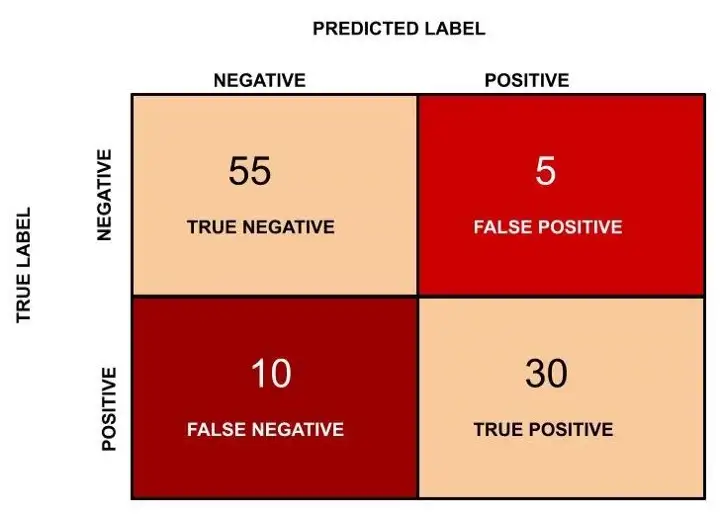

### Accuracy

Accuracy represents the number of correctly classified data instances over the total number of data instances.

In this example, Accuracy = (55 + 30)/(55 + 5 + 30 + 10 ) = 0.85 and in percentage the accuracy will be 85%.

Accuracy may not be a good measure if the dataset is not balanced (both negative and positive classes have different number of data instances).

### Precision

Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

### Recall

Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

### F1 score

F1 Score is needed when you want to seek a balance between Precision and Recall.

Where accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [ ]:
from sklearn import metrics

import matplotlib.pyplot as plt

cm = metrics.multilabel_confusion_matrix(y_test, y_predict)


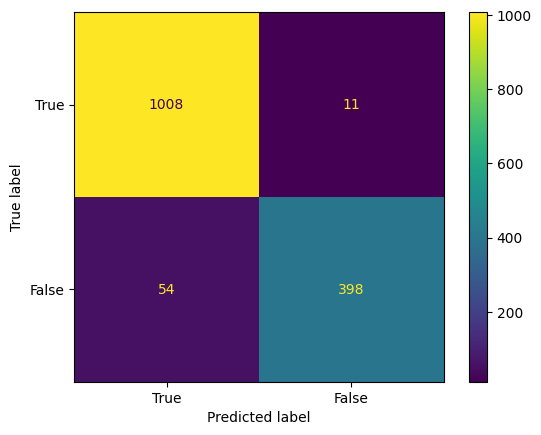

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm[0,:,:], display_labels = ['True', 'False']).plot()
plt.show()

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

metrics = [accuracy_score(y_test, y_predict)*100,\
               precision_score(y_test, y_predict, average='weighted')*100,\
               recall_score(y_test, y_predict, average='weighted')*100,\
               f1_score(y_test, y_predict, average='weighted')*100]

print('Accuracy, Precision, Recall, F1:', tuple(metrics))

Accuracy, Precision, Recall, F1: (94.49354180829368, 94.7073257116443, 94.49354180829368, 94.45455791183115)


Here we can see that the model performs rather well on all calculated scores, i.e. Accracy, Precision, Recall and F1-score. This can further be improved by increasing the pretraining set or tweaking model hyper-parameters.

# Random Result Prediction

The following steps take a sample of 9 images and present to us a simulated visual representation of the model's working on the same.

## Sample selection

In the following cell, we are selecting 9 random images from the dataset.

In [ ]:
test_images = [randint(0, X_test.shape[0]) for _ in range(9)]
print(test_images)

[1160, 925, 859, 548, 531, 1143, 1223, 863, 885]


## Simulation

The following cell plots the respective images and provides the actual and predicted values in "prediction:actual" value pairs.

1/1 [==============================] - 0s 21ms/step


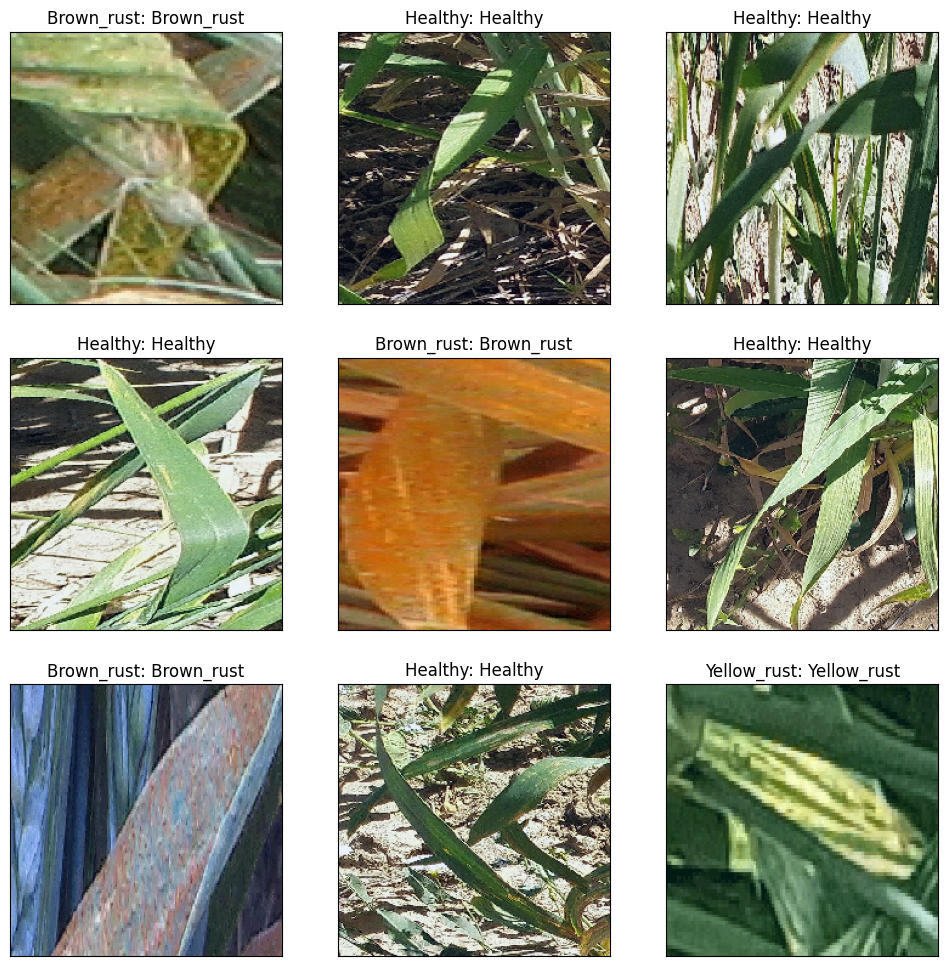

In [ ]:
cv_images = np.empty(shape = (9,224,224,3), dtype = np.uint8)
for img in range(9):
  cv_images[img] = cvtColor(np.array(array_to_img(X_test[test_images[img]])), COLOR_BGR2RGB)
cv_images.shape

#fig, axes = subplots(3,3)
#imshow(cv_images[0], ax = axes[0,0])
f1 = figure(figsize=(12,12))

for i in range(cv_images.shape[0]):
  f1.add_subplot(3,3,i+1)
  #ax_ind = axes[i%3, floor(i/3)]
  pred = model.predict(np.array([X_test[test_images[i]],]))
  pred = rev_label_dict.get(np.array([0,1,2])[pred[0,:] == max(pred[0,:])][0])
  pred = pred + ': ' + rev_label_dict.get(y_test[test_images[i]])
  imshow(cv_images[i])
  xticks([])
  yticks([])
  title(pred)
#imshow(cv_images[0])